In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from radar import radar2, norm_df, radar
import pandas as pd

In [2]:
data = pd.read_hdf('combined_maf_dataframe.hdf')

In [3]:
data.columns

Index(['runName', 'version', 'parallax_best18k', 'properMotion_best18k',
       'fO_fONv MedianNvis', 'fO_fOArea', 'median_coadd_u', 'median_coadd_g',
       'median_coadd_r', 'median_coadd_i', 'median_coadd_z', 'median_coadd_y',
       'SNIa_PrePeak_Mean', 'Fast Microlensing_Mean', 'Slow Microlensing_Mean',
       'KN_PrePeak_Mean', 'GalaxyCountsMetric_extended_N Galaxies (all)',
       'TDEsPopMetric__some_color_Mean', 'TDEsPopMetric__some_color_pu_Mean',
       'WeakLensingNvisits fiveSigmaDepth, visitExposureTime_Median',
       'Nstars_no_crowding_Total N Stars, no crowding',
       'ExgalM5_with_cuts_3x2ptFoM', 'DD:ELAISS1,u', 'DD:XMM-LSS,u',
       'DD:ECDFS,u', 'DD:COSMOS,u', 'DD:EDFS,u', 'DD:EDFSa,u', 'DD:EDFSb,u',
       'DD:ELAISS1,g', 'DD:XMM-LSS,g', 'DD:ECDFS,g', 'DD:COSMOS,g',
       'DD:EDFS,g', 'DD:EDFSa,g', 'DD:EDFSb,g', 'DD:ELAISS1,r', 'DD:XMM-LSS,r',
       'DD:ECDFS,r', 'DD:COSMOS,r', 'DD:EDFS,r', 'DD:EDFSa,r', 'DD:EDFSb,r',
       'DD:ELAISS1,i', 'DD:XMM-LSS,i', 'D

In [4]:
cols = ['runName', 'parallax_best18k', 'properMotion_best18k', 'fO_fONv MedianNvis',
        'SNIa_PrePeak_Mean',
        'TDEsPopMetric__some_color_pu_Mean',
        'WeakLensingNvisits fiveSigmaDepth, visitExposureTime_Median',
        'ExgalM5_with_cuts_3x2ptFoM',
        'Fast Microlensing_Mean', 'GalaxyCountsMetric_extended_N Galaxies (all)',
        'Nstars_no_crowding_Total N Stars, no crowding',
       'NEO bright', 'NEO faint', 'TNO']#,
#        '3 pairs in 15 nights detection loss NEO H=16.0',
#        '3 pairs in 30 nights detection loss NEO H=22.0',
#       '3 pairs in 15 nights detection loss TNO H=4.0']

linear_cols = []#['SNIa_PrePeak_Mean',
           #'TDEsPopMetric__some_color_pu_Mean',
           #'Fast Microlensing_Mean',
           #'3 pairs in 15 nights detection loss NEO H=16.0',
           #'3 pairs in 30 nights detection loss NEO H=22.0',
           #'3 pairs in 15 nights detection loss TNO H=4.0']

mag_cols = ['runName', 'median_coadd_u', 'median_coadd_g',
           'median_coadd_r', 'median_coadd_i',
            'median_coadd_z', 'median_coadd_y']


name_mapper = {'runName': 'runName', 'parallax_best18k': 'Parallax', 'properMotion_best18k': 'Proper Motion',
       'fO_fONv MedianNvis': 'fO N', 'SNIa_PrePeak_Mean': 'SNeIa', 'Fast Microlensing_Mean': 'Fast Micro L',
       'Slow Microlensing_Mean': 'Slow Micro L',
        'TDEsPopMetric__some_color_Mean': 'TDE',
               'TDEsPopMetric__some_color_pu_Mean':'TDE',
               'WeakLensingNvisits fiveSigmaDepth, visitExposureTime_Median': 'WL',
               'ExgalM5_with_cuts_3x2ptFoM': '3x2FoM',
       'GalaxyCountsMetric_extended_N Galaxies (all)': 'N Gals',
       'Nstars_no_crowding_Total N Stars, no crowding': 'N Stars',
       '3 pairs in 15 nights detection loss NEO H=16.0': 'NEO, bright',
               '3 pairs in 30 nights detection loss NEO H=22.0':'NEO, faint',
        '3 pairs in 15 nights detection loss TNO H=6.0':' TNO',
              'NEO bright': 'NEO, bright', 'NEO faint': 'NEO, faint',
              'TNO': 'TNO'}

mag_name_mapper = {'runName': 'runName', 'median_coadd_u': 'u', 'median_coadd_g': 'g',
       'median_coadd_r': 'r', 'median_coadd_i': 'i', 'median_coadd_z': 'z', 'median_coadd_y': 'y'}

In [5]:
data['runName']


0              baseline_nexp1
1              baseline_nexp2
2     cadence_drive_gl100_gcb
3         cadence_drive_gl100
4     cadence_drive_gl200_gcb
               ...           
69                  twi_pairs
70               u_long_ms_30
71               u_long_ms_40
72               u_long_ms_50
73               u_long_ms_60
Name: runName, Length: 74, dtype: object

In [19]:
runs = ['baseline_nexp2'] + [name for name in data['runName'].values if 'cadence' in name]
runs

['baseline_nexp2',
 'cadence_drive_gl100_gcb',
 'cadence_drive_gl100',
 'cadence_drive_gl200_gcb',
 'cadence_drive_gl200',
 'cadence_drive_gl30_gcb',
 'cadence_drive_gl30']

In [20]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'], norm_run='baseline_nexp2')
data_normed = data_normed.rename(columns=name_mapper)

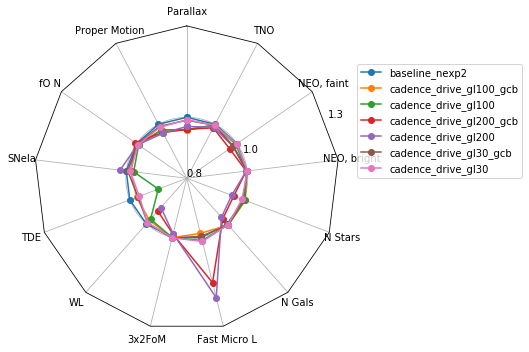

In [21]:
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 1.0, 1.3])
fig.tight_layout()
#fig.savefig('radar_plots/even_filt_radar.pdf')

In [22]:
data_normed

,runName,Parallax,Proper Motion,fO N,SNeIa,TDE,WL,3x2FoM,Fast Micro L,N Gals,N Stars,"NEO, bright","NEO, faint",TNO
1,baseline_nexp2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,cadence_drive_gl100_gcb,0.957583,0.978647,0.998874,0.985342,0.976190,0.984615,1.000986,0.986275,1.004897,1.005824,0.998024,0.985648,0.996567
3,cadence_drive_gl100,0.960212,0.978784,0.992117,0.975570,0.900000,0.979487,1.000104,1.010458,1.004324,1.003805,0.997366,0.995387,0.997503
4,cadence_drive_gl200_gcb,0.960356,0.969262,1.005631,0.985342,0.661905,0.943590,0.988997,1.152941,0.977888,0.964668,0.996268,0.970784,0.986891
5,cadence_drive_gl200,0.970258,0.966749,0.994369,1.021173,0.714286,0.928205,0.987492,1.203922,0.971384,0.957402,0.996707,0.984111,0.988764
6,cadence_drive_gl30_gcb,0.990559,0.992156,0.997748,0.995114,0.971429,0.994872,1.002803,0.996078,1.006202,0.997123,0.999122,0.985136,0.996255
7,cadence_drive_gl30,0.992079,0.989064,0.994369,0.986971,0.966667,0.994872,1.000882,1.013725,1.004005,0.993795,1.000220,0.998975,0.996255


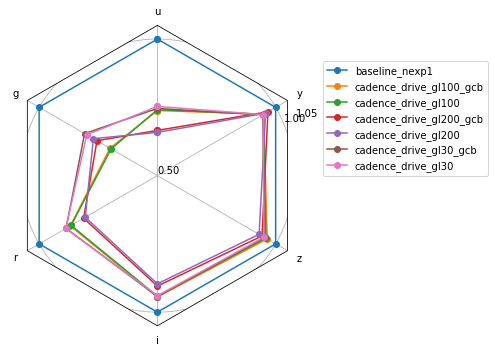

In [11]:
data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_nexp1',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.50, 1.0, 1.05], alpha=.1)
fig.tight_layout()

In [14]:
runs = ['baseline_nexp2'] + [name for name in data['runName'].values if 'twi_p' in name] 

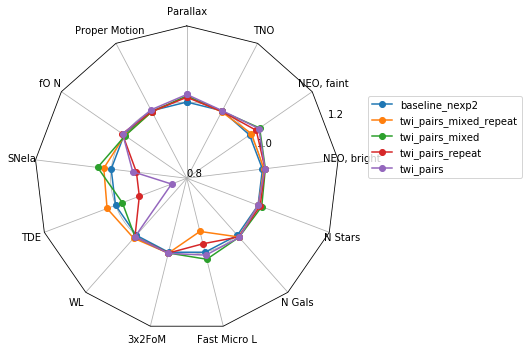

In [16]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline_nexp2')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 1.0, 1.2])
fig.tight_layout()

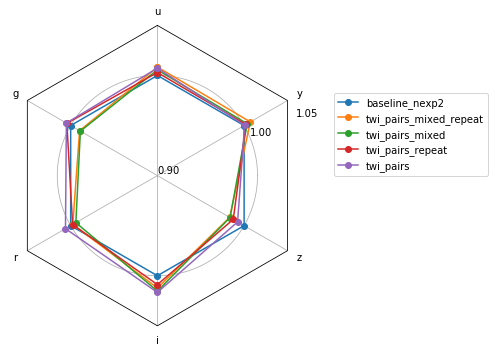

In [18]:
data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_nexp2',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.90, 1.0, 1.05], alpha=.1)
fig.tight_layout()

In [23]:
runs = ['baseline_nexp2'] + [name for name in data['runName'].values if 'twi_ne' in name] 
runs

['baseline_nexp2',
 'twi_neo_pattern1',
 'twi_neo_pattern2',
 'twi_neo_pattern3',
 'twi_neo_pattern4',
 'twi_neo_pattern5',
 'twi_neo_pattern6',
 'twi_neo_pattern7']

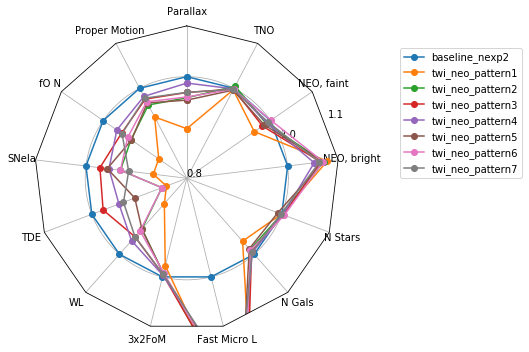

In [24]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline_nexp2')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 1.0, 1.1])
fig.tight_layout()

In [25]:
data_normed

,runName,Parallax,Proper Motion,fO N,SNeIa,TDE,WL,3x2FoM,Fast Micro L,N Gals,N Stars,"NEO, bright","NEO, faint",TNO
1,baseline_nexp2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
59,twi_neo_pattern1,0.897623,0.936284,0.867117,0.866450,0.842857,0.866667,0.977319,1.360131,0.965598,0.998998,1.078375,0.961558,0.996567
60,twi_neo_pattern2,0.958472,0.962898,0.933559,0.931596,0.852381,0.933333,0.993045,1.300654,0.987618,0.999706,1.071350,0.989749,1.004682
61,twi_neo_pattern3,0.968861,0.975964,0.956081,0.972313,0.976190,0.953846,0.995640,1.288889,0.992383,1.003359,1.065423,0.981035,0.998127
62,twi_neo_pattern4,0.987381,0.981917,0.967342,0.954397,0.942857,0.964103,0.996782,1.230719,0.994780,1.002421,1.052689,0.991799,0.998752
63,twi_neo_pattern5,0.953810,0.967483,0.932432,0.957655,0.909524,0.933333,0.993149,1.247712,0.985501,0.991592,1.070692,0.985136,0.995943
64,twi_neo_pattern6,0.960075,0.969912,0.941441,0.931596,0.852381,0.938462,0.991488,1.271242,0.988967,1.005240,1.070252,1.001025,0.998127
65,twi_neo_pattern7,0.969052,0.978124,0.954955,0.915309,0.933333,0.953846,0.994706,1.230719,0.993694,0.998214,1.063008,0.994362,0.997815


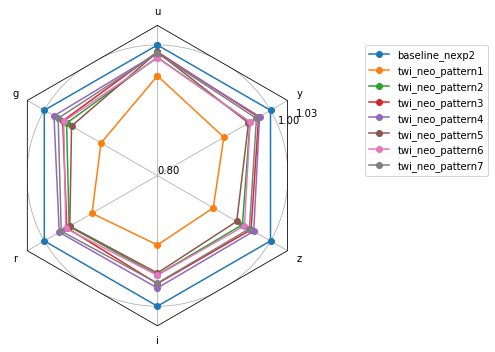

In [27]:

data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_nexp2',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 1.0, 1.03])
fig.tight_layout()
#fig.savefig('radar_plots/var_exp_mags_radar.pdf')

In [28]:
runs = ['baseline_nexp2'] + [name for name in data['runName'].values if 'pair_times' in name] 
runs

['baseline_nexp2',
 'pair_times_11',
 'pair_times_22',
 'pair_times_33',
 'pair_times_44',
 'pair_times_55']

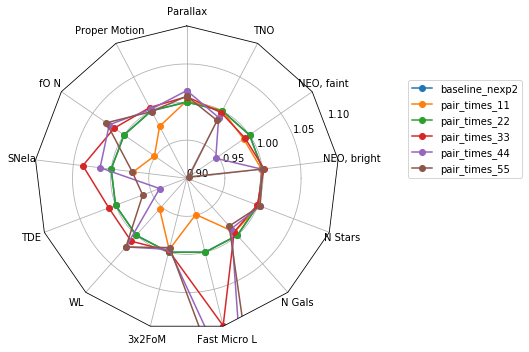

In [29]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='pair_times_22')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.9, 0.95, 1.0, 1.05, 1.1])
fig.tight_layout()

In [30]:
runs = ['baseline_nexp2'] + [name for name in data['runName'].values if 'footprint' in name] 
runs

['baseline_nexp2',
 'footprint_0_v1.710yrs_glance',
 'footprint_1_v1.710yrs_glance',
 'footprint_2_v1.710yrs_glance',
 'footprint_3_v1.710yrs_glance',
 'footprint_4_v1.710yrs_glance',
 'footprint_5_v1.710yrs_glance',
 'footprint_6_v1.710yrs_glance',
 'footprint_7_v1.710yrs_glance',
 'footprint_8_v1.710yrs_glance']

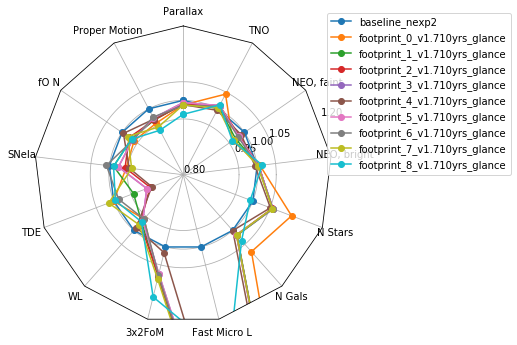

In [32]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline_nexp2')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 0.95, 1.0, 1.05, 1.2])
fig.tight_layout()

In [33]:
runs = ['baseline_nexp2'] + [name for name in data['runName'].values if 'rolling' in name and '_nm' not in name] 
runs

['baseline_nexp2',
 'rolling_scale0.2_nslice2',
 'rolling_scale0.2_nslice3',
 'rolling_scale0.4_nslice2',
 'rolling_scale0.4_nslice3',
 'rolling_scale0.6_nslice2',
 'rolling_scale0.6_nslice3',
 'rolling_scale0.8_nslice2',
 'rolling_scale0.8_nslice3',
 'rolling_scale0.9_nslice2',
 'rolling_scale0.9_nslice3',
 'rolling_scale1.0_nslice2',
 'rolling_scale1.0_nslice3']

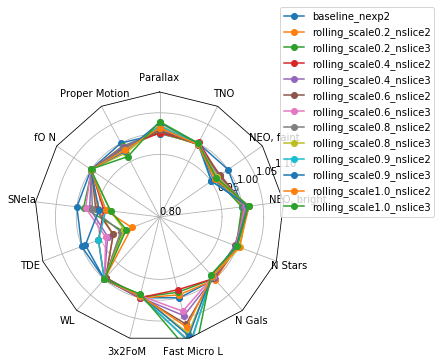

In [35]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline_nexp2')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 0.95, 1.0, 1.05, 1.1])
fig.tight_layout()

In [36]:
runs = ['baseline_nexp2'] + [name for name in data['runName'].values if 'rolling_nm' in name] 
runs

['baseline_nexp2',
 'rolling_nm_scale0.2_nslice2',
 'rolling_nm_scale0.2_nslice3',
 'rolling_nm_scale0.4_nslice2',
 'rolling_nm_scale0.4_nslice3',
 'rolling_nm_scale0.6_nslice2',
 'rolling_nm_scale0.6_nslice3',
 'rolling_nm_scale0.8_nslice2',
 'rolling_nm_scale0.8_nslice3',
 'rolling_nm_scale0.9_nslice2',
 'rolling_nm_scale0.9_nslice3',
 'rolling_nm_scale1.0_nslice2',
 'rolling_nm_scale1.0_nslice3']

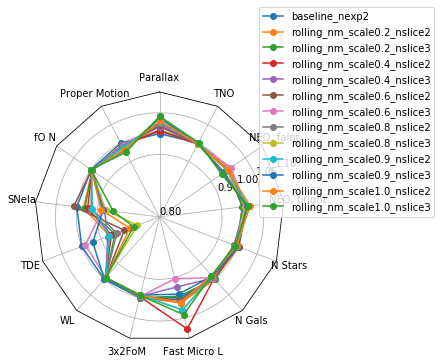

In [37]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'],
                      norm_run='baseline_nexp2')
data_normed = data_normed.rename(columns=name_mapper)
fig, ax = radar(data_normed, legend=True, rgrids=[0.8, 0.95, 1.0, 1.05, 1.1])
fig.tight_layout()